In [1]:
#importamos librerias necesarias para trabajar

import pandas as pd
import numpy as np

# estas son pa pintar
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# para el tiempo
import datetime

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [2]:
#descargamos los CSV necesarios para el analisis

df_matriculas = pd.read_csv("../DATA/datos_universidades/df_super_murcia.csv", index_col = 0)
df_selectividad = pd.read_csv("../DATA/selectividad/dt_selectividad_murcia.csv", index_col = 0)
df_ine = pd.read_csv("../DATA/ine/df_ine_murcia_limpio.csv", index_col = 0)
df_mat_ine=pd.read_csv("../sql/sql_mezcla.csv", index_col = 0)



In [3]:
#tenemos que hacer alguna limpieza en los datos
df_matriculas = df_matriculas.reset_index(drop=False)
df_matriculas['genero'] = df_matriculas['genero'].replace('ambos_sexos', 'ambos sexos')


In [4]:
df_matriculas['año_genero'] = df_matriculas['año'].astype(str) + '_' + df_matriculas['genero'].astype(str)


In [5]:
df_ine = df_ine.reset_index(drop=False)
df_ine = df_ine.apply(lambda x: x.astype(str).str.lower())
df_ine['año_genero'] = df_ine['Periodo'].astype(str) + '_' + df_ine['Sexo'].astype(str)



In [63]:
df_ine_mat = df_ine.merge(df_matriculas, on='año_genero')


In [7]:
df_ine_mat = df_ine_mat.drop(['Sexo', 'año_genero', 'Periodo'], axis=1)

In [8]:
#quiero sacar un grafico de los matriculas con el mercado laboral y para eso evito todas las opciones de universidades yy formatos

df_filtered = df_ine_mat[df_ine_mat['universidad_tipo'] == 'ambas']
df_filtered2 = df_filtered[df_filtered['formato'] == 'ambos_formatos']

In [9]:
df_filtered2.head()

,Tasas,Total,matriculas,año,genero,universidad_tipo,formato,facultad
0,tasa de empleo de la población,37.9875,2733.0,2015-2016,mujeres,ambas,ambos_formatos,Ciencias Sociales y Jurídicas
1,tasa de empleo de la población,37.9875,239.0,2015-2016,mujeres,ambas,ambos_formatos,Ingeniería y Arquitectura
2,tasa de empleo de la población,37.9875,599.0,2015-2016,mujeres,ambas,ambos_formatos,Artes y Humanidades
3,tasa de empleo de la población,37.9875,1677.0,2015-2016,mujeres,ambas,ambos_formatos,Ciencias de la Salud
4,tasa de empleo de la población,37.9875,353.0,2015-2016,mujeres,ambas,ambos_formatos,Ciencias


In [10]:
df_filtered2.loc[:, 'Total'] = pd.to_numeric(df_filtered2['Total'], errors='coerce')
df_filtered2.loc[:, 'matriculas'] = pd.to_numeric(df_filtered2['matriculas'], errors='coerce')

In [11]:

df_result = df_filtered2.groupby(["año", "genero", "Tasas"]).agg({"Total": "first", "matriculas": "sum"}).reset_index()

In [12]:
#trabajo sobre este df para los siguientes graficos

df_result.head()

,año,genero,Tasas,Total,matriculas
0,2015-2016,ambos sexos,tasa de actividad,59.1525,10132.0
1,2015-2016,ambos sexos,tasa de empleo de la población,44.815,10132.0
2,2015-2016,ambos sexos,tasa de paro de la población,21.015,10132.0
3,2015-2016,hombres,tasa de actividad,67.4675,4531.0
4,2015-2016,hombres,tasa de empleo de la población,54.9775,4531.0


In [13]:

#primero el paro frente a matriculas
df_filtered3 = df_result[df_result['Tasas'] == 'tasa de paro de la población']

In [14]:
df_filtered4 = df_filtered3[df_filtered3['genero'] == 'ambos sexos']
df_filtered4['Total'] = pd.to_numeric(df_filtered4['Total'], errors='coerce')
df_filtered4['matriculas'] = pd.to_numeric(df_filtered4['matriculas'], errors='coerce')
df_filtered4.dtypes


/var/folders/8g/yj4fgsmn6q59m4_81r8zknph0000gn/T/ipykernel_76349/2272546219.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered4['Total'] = pd.to_numeric(df_filtered4['Total'], errors='coerce')
/var/folders/8g/yj4fgsmn6q59m4_81r8zknph0000gn/T/ipykernel_76349/2272546219.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered4['matriculas'] = pd.to_numeric(df_filtered4['matriculas'], errors='coerce')


año            object
genero         object
Tasas          object
Total         float64
matriculas    float64
dtype: object

In [15]:
df_filtered4.head(10)

,año,genero,Tasas,Total,matriculas
2,2015-2016,ambos sexos,tasa de paro de la población,21.0150,10132.0
11,2016-2017,ambos sexos,tasa de paro de la población,18.3750,9836.0
20,2017-2018,ambos sexos,tasa de paro de la población,17.1075,9637.0
29,2018-2019,ambos sexos,tasa de paro de la población,14.6175,9877.0
38,2019-2020,ambos sexos,tasa de paro de la población,16.3425,10183.0
47,2020-2021,ambos sexos,tasa de paro de la población,14.9025,10183.0
56,2021-2022,ambos sexos,tasa de paro de la población,13.2700,5196.0


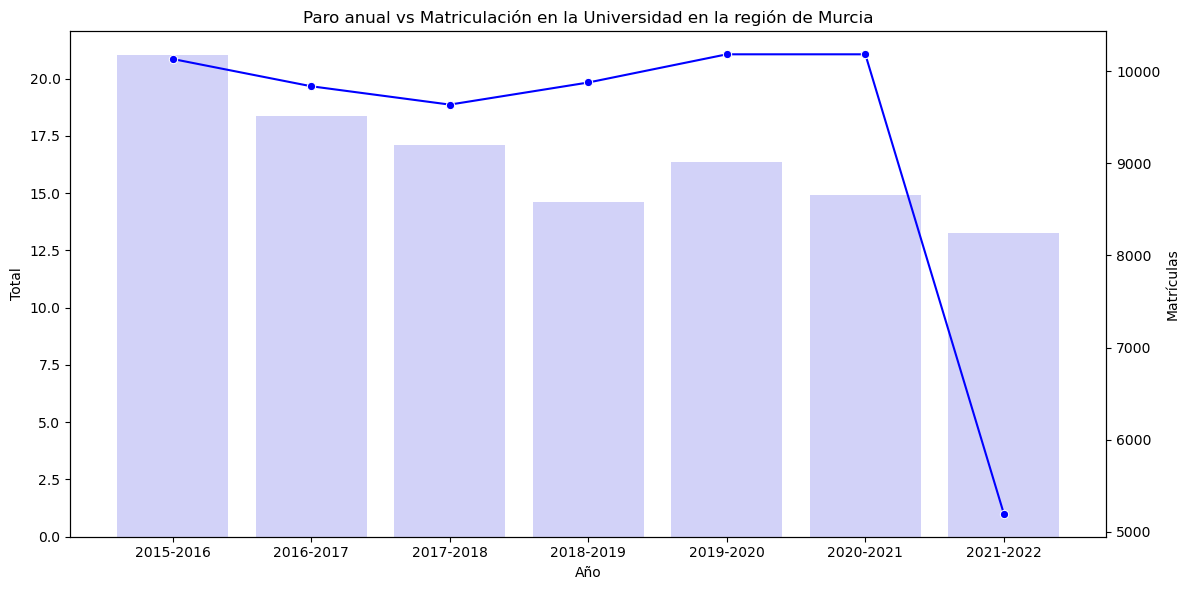

In [97]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax1 = plt.subplots(figsize=(12, 6))

# Grafico de barras
sns.barplot(data=df_filtered4, x='año', y='Total', color='blue', alpha=0.2, ax=ax1)

# Grafico de lineas
ax2 = ax1.twinx()
sns.lineplot(data=df_filtered4, x='año', y='matriculas', color='blue', marker='o', ax=ax2)

# Personalizar ejes y etiquetas
ax1.set_ylabel('Total')
ax2.set_ylabel('Matrículas')
ax1.set_xlabel('Año')
ax1.set_title("Paro anual vs Matriculación en la Universidad en la región de Murcia")

# Ajustar el espaciado entre subplots
fig.tight_layout()
plt.savefig('paro_anual_vs_mat.png')

# Mostrar el gráfico
plt.show()


In [ ]:
#segundo el tasa de actividad frente a matriculas

In [42]:
df_filtered5 = df_result[df_result['Tasas'] == 'tasa de actividad']

In [52]:
df_filtered6 = df_filtered5[df_filtered5['genero'] == 'ambos sexos']
df_filtered6['Total'] = pd.to_numeric(df_filtered6['Total'], errors='coerce')
df_filtered6['matriculas'] = pd.to_numeric(df_filtered6['matriculas'], errors='coerce')
df_filtered6


/var/folders/8g/yj4fgsmn6q59m4_81r8zknph0000gn/T/ipykernel_76349/3900935755.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered6['Total'] = pd.to_numeric(df_filtered6['Total'], errors='coerce')
/var/folders/8g/yj4fgsmn6q59m4_81r8zknph0000gn/T/ipykernel_76349/3900935755.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered6['matriculas'] = pd.to_numeric(df_filtered6['matriculas'], errors='coerce')


,año,genero,Tasas,Total,matriculas
0,2015-2016,ambos sexos,tasa de actividad,59.1525,10132.0
9,2016-2017,ambos sexos,tasa de actividad,59.3750,9836.0
18,2017-2018,ambos sexos,tasa de actividad,59.3600,9637.0
27,2018-2019,ambos sexos,tasa de actividad,59.1425,9877.0
36,2019-2020,ambos sexos,tasa de actividad,58.6525,10183.0
45,2020-2021,ambos sexos,tasa de actividad,59.7925,10183.0
54,2021-2022,ambos sexos,tasa de actividad,60.2675,5196.0


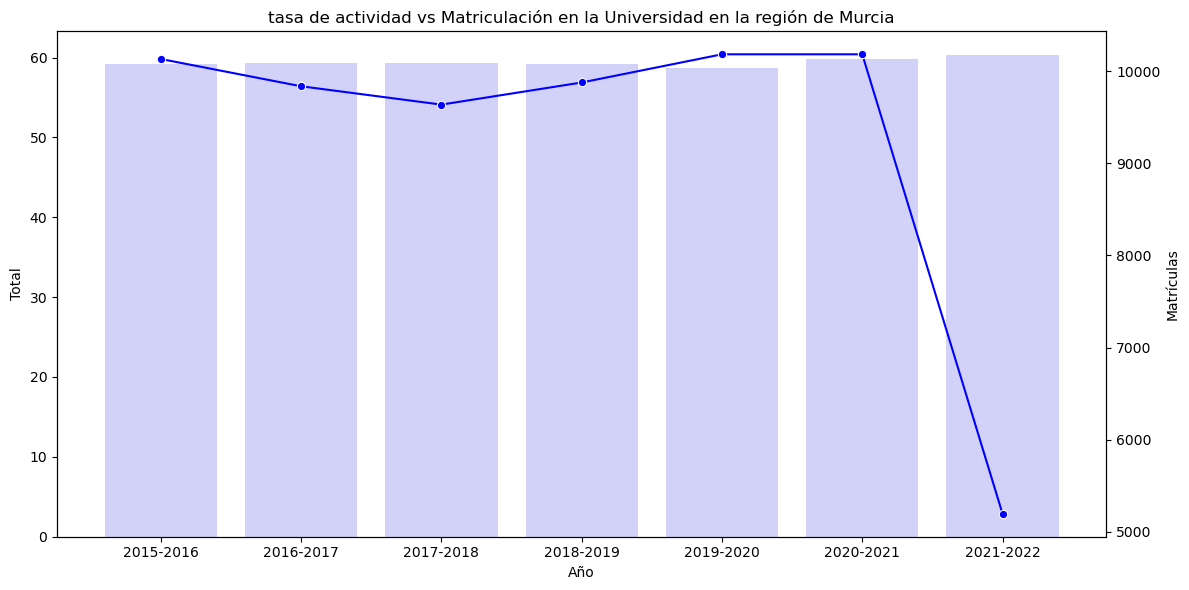

In [98]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax1 = plt.subplots(figsize=(12, 6))

# Grafico de barras
sns.barplot(data=df_filtered6, x='año', y='Total', color='blue', alpha=0.2, ax=ax1)

# Grafico de lineas
ax2 = ax1.twinx()
sns.lineplot(data=df_filtered6, x='año', y='matriculas', color='blue', marker='o', ax=ax2)

# Personalizar ejes y etiquetas
ax1.set_ylabel('Total')
ax2.set_ylabel('Matrículas')
ax1.set_xlabel('Año')
ax1.set_title("tasa de actividad vs Matriculación en la Universidad en la región de Murcia")

# Ajustar el espaciado entre subplots
fig.tight_layout()
plt.savefig('tasa_actividad_anual_vs_mat.png')

# Mostrar el gráfico
plt.show()


In [ ]:
#tercero el empleo frente a matriculas

In [55]:
df_filtered7 = df_result[df_result['Tasas'] == 'tasa de empleo de la población']

In [56]:
df_filtered8 = df_filtered7[df_filtered7['genero'] == 'ambos sexos']
df_filtered8['Total'] = pd.to_numeric(df_filtered8['Total'], errors='coerce')
df_filtered8['matriculas'] = pd.to_numeric(df_filtered8['matriculas'], errors='coerce')
df_filtered8


/var/folders/8g/yj4fgsmn6q59m4_81r8zknph0000gn/T/ipykernel_76349/2239950358.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered8['Total'] = pd.to_numeric(df_filtered8['Total'], errors='coerce')
/var/folders/8g/yj4fgsmn6q59m4_81r8zknph0000gn/T/ipykernel_76349/2239950358.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered8['matriculas'] = pd.to_numeric(df_filtered8['matriculas'], errors='coerce')


,año,genero,Tasas,Total,matriculas
1,2015-2016,ambos sexos,tasa de empleo de la población,44.8150,10132.0
10,2016-2017,ambos sexos,tasa de empleo de la población,47.4375,9836.0
19,2017-2018,ambos sexos,tasa de empleo de la población,48.7875,9637.0
28,2018-2019,ambos sexos,tasa de empleo de la población,49.3725,9877.0
37,2019-2020,ambos sexos,tasa de empleo de la población,50.4425,10183.0
46,2020-2021,ambos sexos,tasa de empleo de la población,49.3150,10183.0
55,2021-2022,ambos sexos,tasa de empleo de la población,51.7125,5196.0


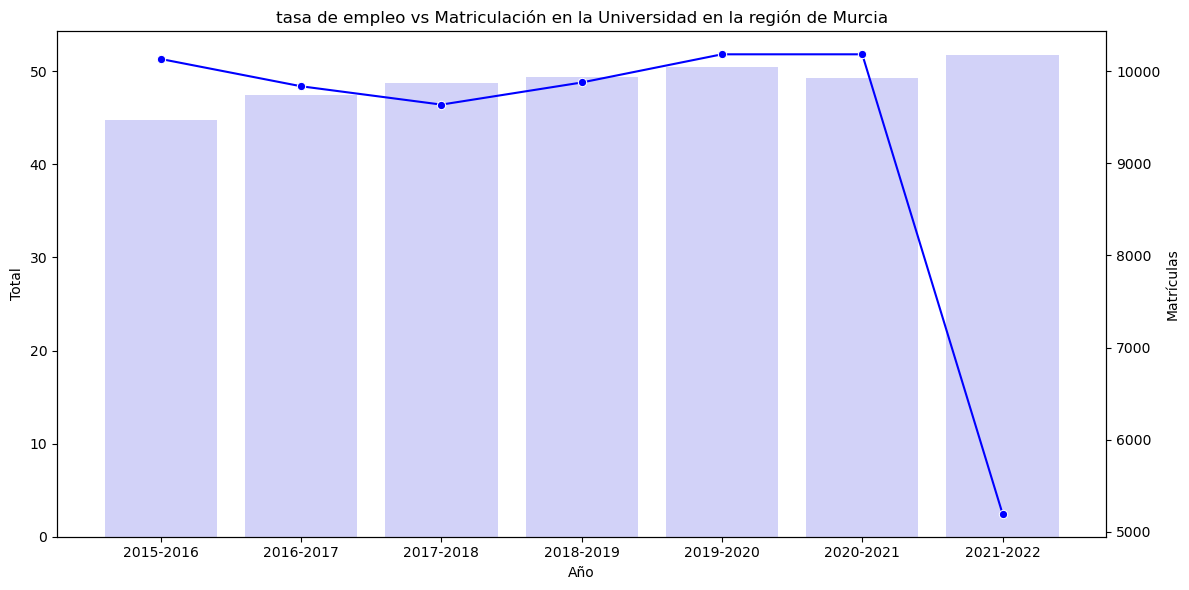

In [99]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax1 = plt.subplots(figsize=(12, 6))

# Grafico de barras
sns.barplot(data=df_filtered8, x='año', y='Total', color='blue', alpha=0.2, ax=ax1)

# Grafico de lineas
ax2 = ax1.twinx()
sns.lineplot(data=df_filtered8, x='año', y='matriculas', color='blue', marker='o', ax=ax2)

# Personalizar ejes y etiquetas
ax1.set_ylabel('Total')
ax2.set_ylabel('Matrículas')
ax1.set_xlabel('Año')
ax1.set_title("tasa de empleo vs Matriculación en la Universidad en la región de Murcia")

# Ajustar el espaciado entre subplots
fig.tight_layout()
plt.savefig('tasa_empleo_vs_mat.png')

# Mostrar el gráfico
plt.show()


No hay ningún dato que diga que el mercado laboral afecta a las matriculas. El comportamiento no se ve afectado

Vamos a ver si las facultades tienen algún comportamiento que merezca ser resaltado. lo vamos a mirar desde la perspectiva de genero para ver como se comportan los hombres y las mujeres.

In [64]:
import numpy as np

# Reemplazar '-' con NaN en la columna 'matriculas'
df_matriculas['matriculas'] = df_matriculas['matriculas'].replace('-', np.nan)

# Convertir la columna 'matriculas' a tipo float
df_matriculas['matriculas'] = df_matriculas['matriculas'].astype(float)



In [65]:
# Filtrar los datos por universidad_tipo, formato y genero
filtered_df = df_matriculas[(df_matriculas['universidad_tipo'] == 'ambas') & (df_matriculas['formato'] == 'ambos_formatos') & (df_matriculas['genero'] == 'hombres')]

# Extraer los datos por año, genero y facultad
hombres_mat = filtered_df.groupby(['año', 'genero', 'facultad'])['matriculas'].sum().reset_index()




In [66]:
# Filtrar los datos por universidad_tipo, formato y genero
filtered_df = df_matriculas[(df_matriculas['universidad_tipo'] == 'ambas') & (df_matriculas['formato'] == 'ambos_formatos') & (df_matriculas['genero'] == 'mujeres')]

# Extraer los datos por año, genero y facultad
mujeres_mat = filtered_df.groupby(['año', 'genero', 'facultad'])['matriculas'].sum().reset_index()




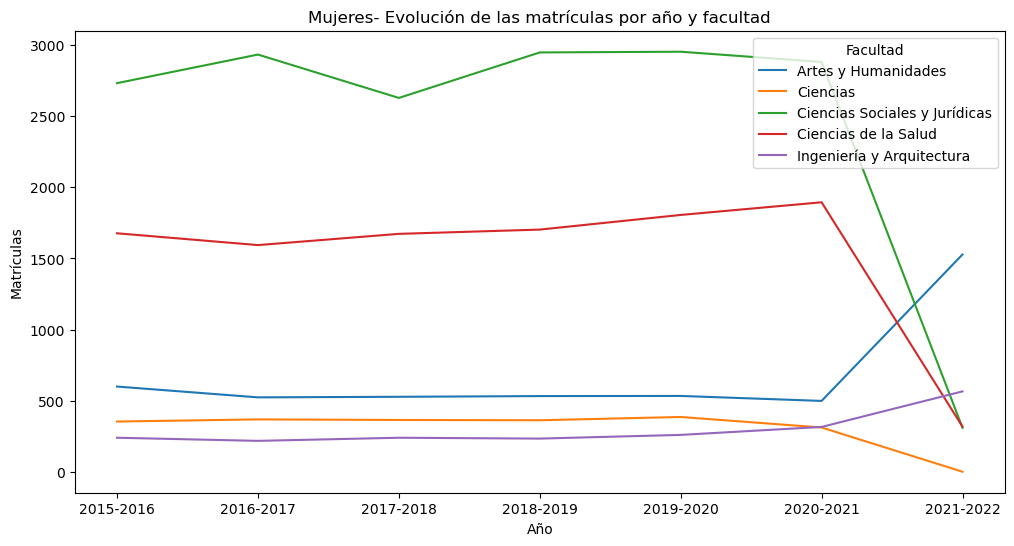

In [103]:
import seaborn as sns
import matplotlib.pyplot as plt

# Configurar el tamaño de la figura
plt.figure(figsize=(12, 6))

# Crear el gráfico de líneas
sns.lineplot(data=mujeres_mat, x='año', y='matriculas', hue='facultad')

# Configurar los ejes y el título
plt.xlabel('Año')
plt.ylabel('Matrículas')
plt.title('Mujeres- Evolución de las matrículas por año y facultad')

# Mostrar la leyenda
plt.legend(title='Facultad')
plt.savefig('mat_mujeres_año_facultad.png')
# Mostrar el gráfico
plt.show()


In [71]:
mujeres_mat.head(5)


,año,genero,facultad,matriculas
0,2015-2016,mujeres,Artes y Humanidades,599.0
1,2015-2016,mujeres,Ciencias,353.0
2,2015-2016,mujeres,Ciencias Sociales y Jurídicas,2733.0
3,2015-2016,mujeres,Ciencias de la Salud,1677.0
4,2015-2016,mujeres,Ingeniería y Arquitectura,239.0


la media de matriculas en los utimos años de las mujeres por facultades 

In [77]:
media_mat_mujeres = mujeres_mat.groupby('facultad')['matriculas'].mean()
media_mat_mujeres

facultad
Artes y Humanidades               677.142857
Ciencias                          306.142857
Ciencias Sociales y Jurídicas    2484.285714
Ciencias de la Salud             1523.571429
Ingeniería y Arquitectura         295.285714
Name: matriculas, dtype: float64

In [80]:
df_filtered81 = df_matriculas.loc[(df_matriculas['universidad_tipo'] == 'ambas') &
                                (df_matriculas['formato'] == 'ambos_formatos') &
                                (df_matriculas['genero'] != 'ambos sexos')]


In [87]:
df_media81 = df_filtered81.groupby(['facultad', 'genero'])['matriculas'].mean().reset_index()
df_separated = df_media81.pivot(index='facultad', columns='genero', values='matriculas').reset_index()

df_separated

genero,facultad,hombres,mujeres
0,Artes y Humanidades,355.857143,677.142857
1,Ciencias,329.500000,357.166667
2,Ciencias Sociales y Jurídicas,1771.000000,2484.285714
3,Ciencias de la Salud,671.142857,1523.571429
4,Ingeniería y Arquitectura,925.142857,295.285714


In [92]:
df_separated['diferencia'] = df_separated['mujeres'] - df_separated['hombres']
df_separated

genero,facultad,hombres,mujeres,diferencia
0,Artes y Humanidades,355.857143,677.142857,321.285714
1,Ciencias,329.500000,357.166667,27.666667
2,Ciencias Sociales y Jurídicas,1771.000000,2484.285714,713.285714
3,Ciencias de la Salud,671.142857,1523.571429,852.428571
4,Ingeniería y Arquitectura,925.142857,295.285714,-629.857143


que interesante, siempre hay muchas mas mujeres que hombres matriculadas en todas las areas a excepcion que en ingenieria. vamos a pintarlo.

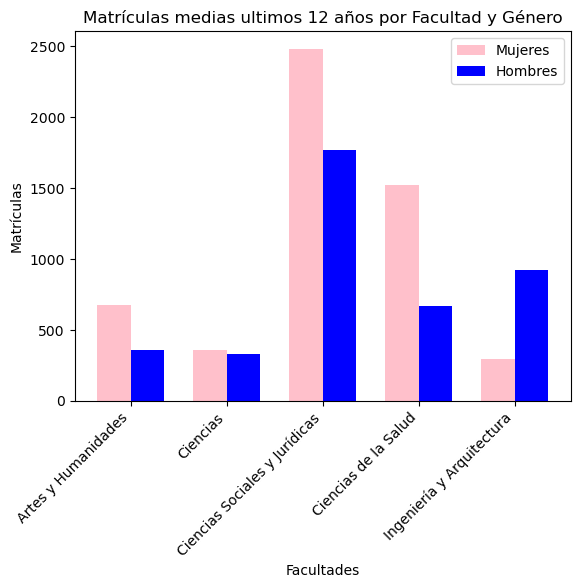

In [101]:
import matplotlib.pyplot as plt

# Configurar los datos para el gráfico de barras
facultades = df_separated['facultad']
matriculas_mujeres = df_separated['mujeres']
matriculas_hombres = df_separated['hombres']

# Configurar la posición de las barras
posiciones = range(len(facultades))
ancho_barras = 0.35

# Crear el gráfico de barras
fig, ax = plt.subplots()
bar1 = ax.bar(posiciones, matriculas_mujeres, ancho_barras, color='pink', label='Mujeres')
bar2 = ax.bar([p + ancho_barras for p in posiciones], matriculas_hombres, ancho_barras, color='blue', label='Hombres')

# Configurar el título y los ejes
ax.set_title('Matrículas medias ultimos 12 años por Facultad y Género')
ax.set_xlabel('Facultades')
ax.set_ylabel('Matrículas')

# Configurar las etiquetas en el eje x con rotación de 45 grados
ax.set_xticks([p + ancho_barras/2 for p in posiciones])
ax.set_xticklabels(facultades, rotation=45, ha='right')

# Mostrar la leyenda
ax.legend()

# Mostrar el gráfico
plt.savefig('mat_media_facul_genero.png')
plt.show()



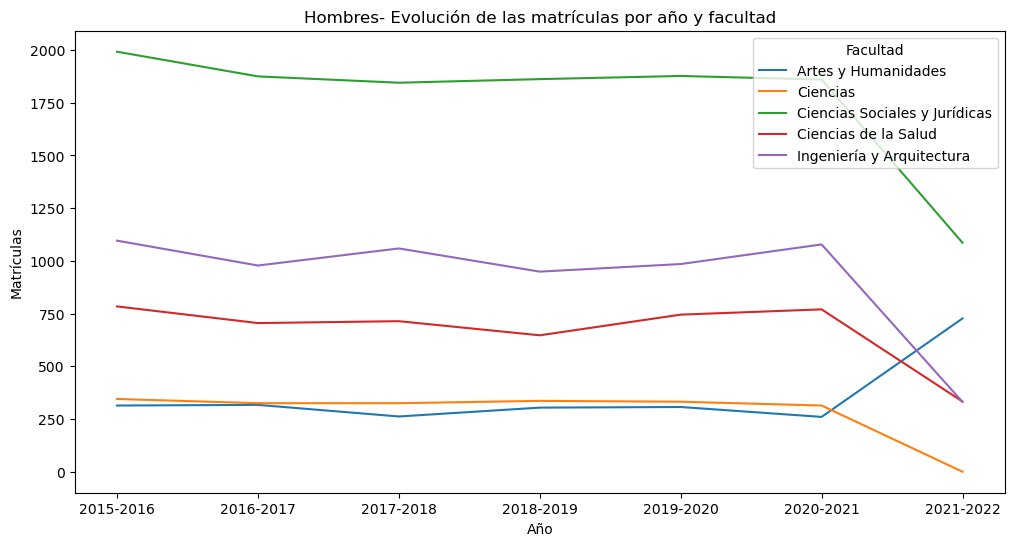

In [100]:
import seaborn as sns
import matplotlib.pyplot as plt

# Configurar el tamaño de la figura
plt.figure(figsize=(12, 6))

# Crear el gráfico de líneas
sns.lineplot(data=hombres_mat, x='año', y='matriculas', hue='facultad')

# Configurar los ejes y el título
plt.xlabel('Año')
plt.ylabel('Matrículas')
plt.title('Hombres- Evolución de las matrículas por año y facultad')

# Mostrar la leyenda
plt.legend(title='Facultad')
plt.savefig('mat_hombres_año_facultad.png')

# Mostrar el gráfico
plt.show()


la media de matriculas en los utimos años de los hombres por facultades 

In [74]:
media_mat_hombres = hombres_mat.groupby('facultad')['matriculas'].mean()
media_mat_hombres

facultad
Artes y Humanidades               355.857143
Ciencias                          282.428571
Ciencias Sociales y Jurídicas    1771.000000
Ciencias de la Salud              671.142857
Ingeniería y Arquitectura         925.142857
Name: matriculas, dtype: float64

In [24]:
import pandas as pd

# Filtrar los datos
df_filtered6 = df_matriculas[(df_matriculas['genero'] == 'ambos sexos') &
                            (df_matriculas['universidad_tipo'] == 'ambas')]

# Sumar los valores de matrículas por año, formato y facultad
df_for = df_filtered6.groupby(['año', 'formato', 'facultad'])['matriculas'].sum().reset_index()

# Sumar los valores de matrículas para el mismo año y formato
df_formato = df_for.groupby(['año', 'formato'])['matriculas'].sum().reset_index()

# Mostrar el resultado
df_formato.head()


,año,formato,matriculas
0,2015-2016,ambos_formatos,10132.0
1,2015-2016,online,0.0
2,2015-2016,presencial,10132.0
3,2016-2017,ambos_formatos,9836.0
4,2016-2017,online,0.0


In [25]:
import matplotlib.pyplot as plt

# Filtrar los datos por año y formato
df_year_format = df_formato.groupby(['año', 'formato'])['matriculas'].sum().unstack().reset_index()

df_year_format

formato,año,ambos_formatos,online,presencial
0,2015-2016,10132.0,0.0,10132.0
1,2016-2017,9836.0,0.0,9836.0
2,2017-2018,9637.0,0.0,9637.0
3,2018-2019,9877.0,0.0,9877.0
4,2019-2020,10183.0,0.0,10183.0
5,2020-2021,10183.0,0.0,10183.0
6,2021-2022,5196.0,0.0,5196.0


EVOLUCION DE SELECTIVIDAD


In [68]:
df_selectividad.reset_index(inplace=True)
df_selectividad['valor selectividad'] = pd.to_numeric(df_selectividad['valor selectividad'], errors='coerce')


ValueError: cannot insert level_0, already exists

In [35]:

df_selectividad['valor selectividad'] = df_selectividad['valor selectividad'].replace({
    7901.000: 7.901,
    6435.866: 6.435866,
    5035.000: 5.035000
})

In [67]:


df_media = df_selectividad.groupby(['facultad', 'año'])['valor selectividad'].mean().reset_index()
df_media.at[22, 'año'] = '2021-2022'


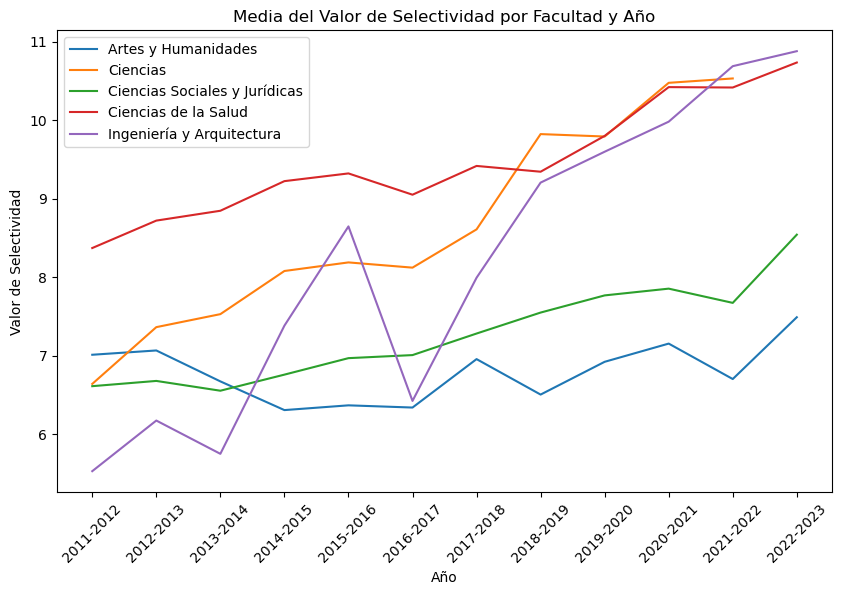

In [102]:
# Configurar el gráfico
plt.figure(figsize=(10, 6))

# Iterar por cada facultad
for facultad in df_media['facultad'].unique():
    # Filtrar los datos por facultad
    df_facultad = df_media[df_media['facultad'] == facultad]
    
    # Obtener los valores de año y valor selectividad
    años = df_facultad['año']
    valores = df_facultad['valor selectividad']
    
    # Graficar la línea de la facultad
    plt.plot(años, valores, label=facultad)

# Configurar el título y los ejes
plt.title('Media del Valor de Selectividad por Facultad y Año')
plt.xlabel('Año')
plt.ylabel('Valor de Selectividad')

# Rotar la leyenda del eje x
plt.xticks(rotation=45)

# Mostrar la leyenda
plt.legend()
plt.savefig('media_selectividad_fac_año.png')

# Mostrar el gráfico
plt.show()


#calculamos el porcetaje de crecimiento de la nota de selectividad desde 2011 a 2022

In [62]:

df_crecimiento_porcentaje = ((df_media.groupby('facultad')['valor selectividad'].last() - df_media.groupby('facultad')['valor selectividad'].first()) / df_media.groupby('facultad')['valor selectividad'].first()) * 100


df_crecimiento_porcentaje


facultad
Artes y Humanidades               6.816738
Ciencias                         58.611299
Ciencias Sociales y Jurídicas    29.196756
Ciencias de la Salud             28.235353
Ingeniería y Arquitectura        96.800941
Name: valor selectividad, dtype: float64

MADRE MIA!! en el caso de Artes y Humanidades ha subido el que menos con un 6,8% pero es que en ingenieria ha subido un 96,8%% Luego dirán que faltan carreras tecnicas!!!